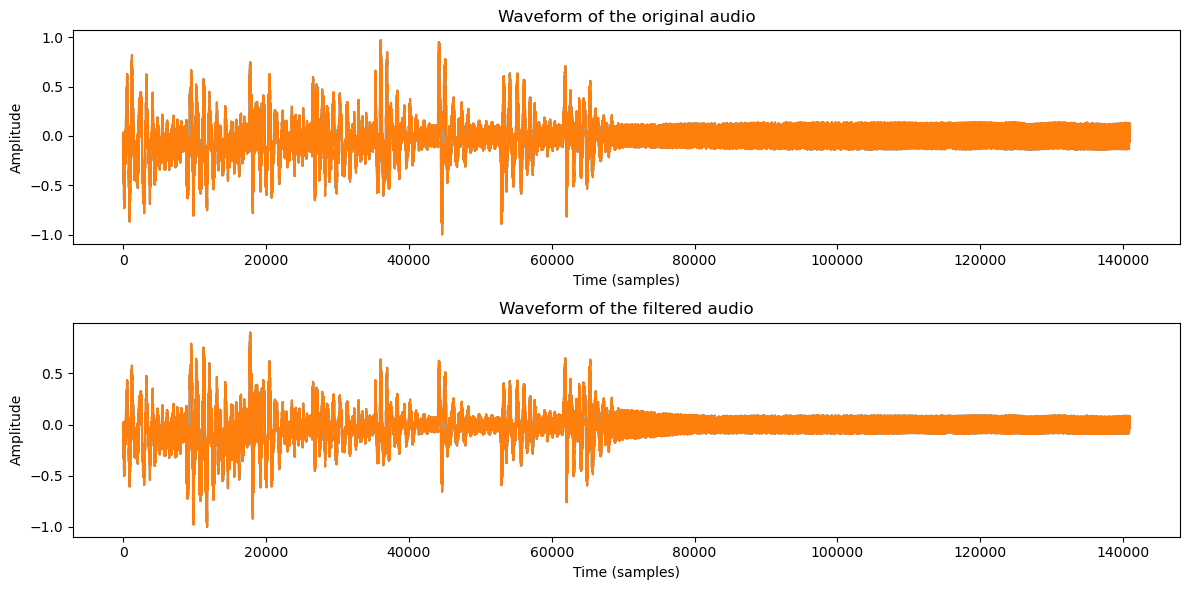

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

class Equalizer:
    def __init__(self, fs):
        self.fs = fs
        self.audio = None

    def apply_equalizer(self, audio, freq_bands, gains, gain_master=1.0):
        spectrum = np.fft.rfft(audio)
        f = np.linspace(0, self.fs/2, len(spectrum), endpoint=True)
        filter = self.create_filter(f, freq_bands, gains)
        spectrum_filtered = spectrum * np.expand_dims(filter, axis=1) * gain_master
        audio_filtered = np.fft.irfft(spectrum_filtered).real
        return audio_filtered

    def create_filter(self, f, freq_bands, gains):
        alpha = 7e-7  
        x = np.ones_like(f)
        for i in range(len(freq_bands)):
            x *= 1 + gains[i] * np.exp(-alpha * (f - self.fs * freq_bands[i] / 2048)**2)
        return x

    def save_audio(self, audio, filename='C:\\Users\\Админ\\Downloads\\filtered_audioNEW37.wav'):
        scale_factor = np.iinfo(np.int16).max
        wavfile.write(filename, self.fs, (audio * scale_factor).astype(np.int16))

    def play_audio(self, audio):
        self.save_audio(audio)
        rate, audio_output = wavfile.read("C:\\Users\\Админ\\Downloads\\filtered_audioNEW37.wav")
        self.audio = audio_output
        return audio_output

# Read the original WAV file
filename = 'C:\\Users\\Админ\\Downloads\\sample-3s.wav'
rate, audio_original = wavfile.read(filename)

# Create an Equalizer object
eq = Equalizer(rate)

# Определение частотных диапазонов и коэффициентов усиления
freq_bands = [100, 500, 2000, 5000]
gains = [1.1, 0.9, 0.7, 1.2]

audio_filtered = eq.apply_equalizer(audio_original, freq_bands, gains, gain_master=1.5)

# Save the filtered audio to a new WAV file
eq.save_audio(audio_filtered, 'C:\\Users\\Админ\\Downloads\\filtered_audioNEW37.wav')

# Plot the waveform of the original and filtered audio
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(audio_original / np.max(np.abs(audio_original)))
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Waveform of the original audio')

plt.subplot(2, 1, 2)
plt.plot(audio_filtered / np.max(np.abs(audio_filtered)))
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Waveform of the filtered audio')

plt.tight_layout()


C:\Users\Админ\AppData\Local\Temp\ipykernel_13192\1823403651.py:42: RuntimeWarning: invalid value encountered in cast
  wavfile.write(filename, self.fs, (audio * scale_factor).astype(np.int16))


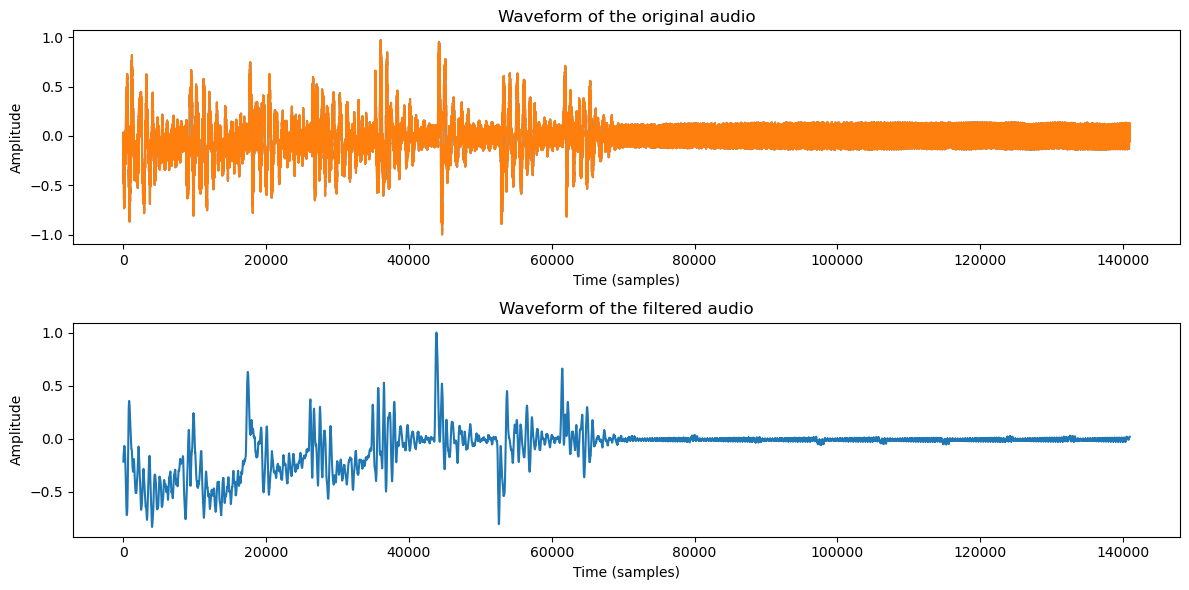

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

class Equalizer:
    def __init__(self, fs):
        self.fs = fs
        self.audio = None

    def apply_equalizer(self, audio, freq_bands, gains, gain_master=1.0, method='nonrecursive'):
        if method == 'nonrecursive':
            b = self.create_kih_filter(freq_bands, gains)
            audio_filtered = self.filter_kih(audio, b)
        elif method == 'recursive':
            b, a = self.create_recursive_filter(freq_bands, gains)
            audio_filtered = self.filter_recursive(audio, b, a)

        return audio_filtered

    def create_kih_filter(self, freq_bands, gains):
        alpha = 7e-7  
        fft_len = 2048
        f = np.linspace(0, self.fs/2, fft_len//2, endpoint=True)
        x = np.ones_like(f)
        for i in range(len(freq_bands)):
            x *= 1 + gains[i] * np.exp(-alpha * (f - self.fs * freq_bands[i] / fft_len)**2)
        return x

    def filter_kih(self, audio, b):
        return np.convolve(audio, b, mode='same')

    def create_recursive_filter(self, freq_bands, gains):
        b = np.array([1.0] + gains)
        a = np.ones_like(b)
        return b, a

    def filter_recursive(self, audio, b, a):
        return np.convolve(audio, b, mode='same') / np.convolve(audio, a, mode='same')

    def save_audio(self, audio, filename='C:\\Users\\Админ\\Downloads\\filtered_.wav'):
        scale_factor = np.iinfo(np.int16).max
        wavfile.write(filename, self.fs, (audio * scale_factor).astype(np.int16))

    def play_audio(self, audio):
        self.save_audio(audio)
        rate, audio_output = wavfile.read("C:\\Users\\Админ\\Downloads\\filtered_.wav")
        self.audio = audio_output
        return audio_output

# Read the original WAV file
filename = 'C:\\Users\\Админ\\Downloads\\sample-3s.wav'
rate, audio_original = wavfile.read(filename)

# Create an Equalizer object
eq = Equalizer(rate)

# Define frequency bands and gains
freq_bands = [100, 500, 2000, 5000]
gains = [1.1, 0.9, 0.7, 1.2]

audio_filtered = eq.apply_equalizer(audio_original[:, 0], freq_bands, gains, gain_master=1.5, method='nonrecursive')

# Save the filtered audio to a new WAV file
eq.save_audio(audio_filtered, 'C:\\Users\\Админ\\Downloads\\filtered_.wav')

# Plot the waveform of the original and filtered audio
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(audio_original / np.max(np.abs(audio_original)))
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Waveform of the original audio')

plt.subplot(2, 1, 2)
plt.plot(audio_filtered / np.max(np.abs(audio_filtered)))
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Waveform of the filtered audio')

plt.tight_layout()
plt.show()


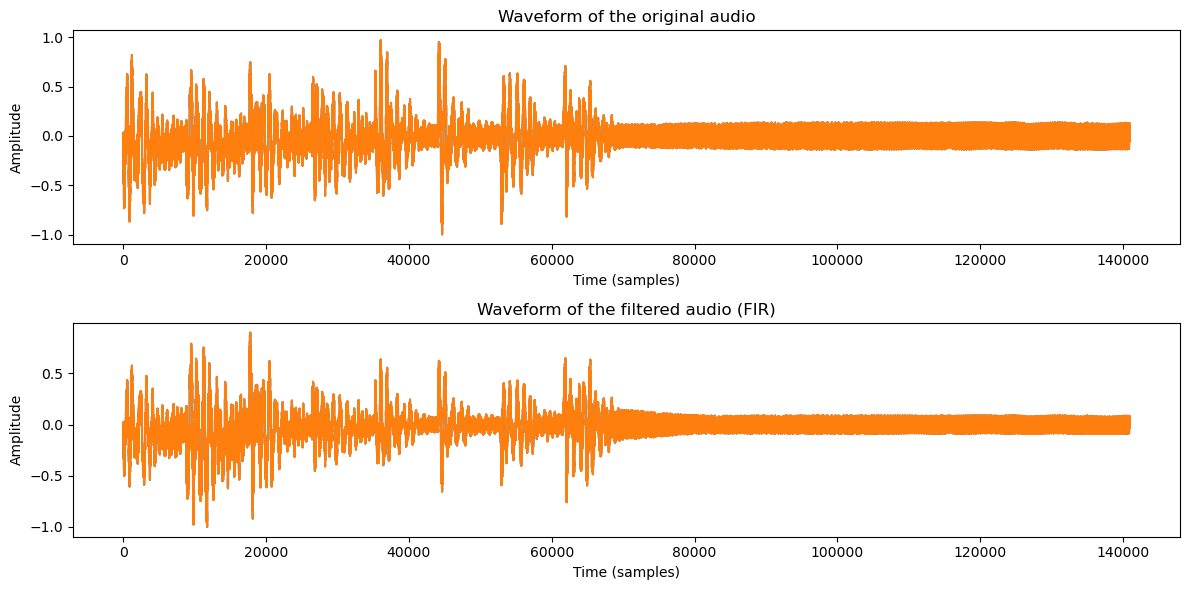

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

class Equalizer:
    def __init__(self, fs):
        self.fs = fs
        self.audio = None

    def apply_equalizer(self, audio, freq_bands, gains, filter_type='fir', gain_master=1.0):
        spectrum = np.fft.rfft(audio)
        f = np.linspace(0, self.fs/2, len(spectrum), endpoint=True)

        if filter_type == 'fir':
            filter = self.create_filter_fir(f, freq_bands, gains)
            spectrum_filtered = spectrum * np.expand_dims(filter, axis=1) * gain_master
            audio_filtered = np.fft.irfft(spectrum_filtered).real
            return audio_filtered
        elif filter_type == 'iir':
            filter_b, filter_a = self.create_filter_iir(f, freq_bands, gains)
            audio_filtered = self.filter_signal_iir(audio, filter_b, filter_a)
            return audio_filtered
        else:
            raise ValueError("Unknown filter type. Use 'fir' or 'iir'.")

    def create_filter_fir(self, f, freq_bands, gains):
        alpha = 7e-7  
        x = np.ones_like(f)
        for i in range(len(freq_bands)):
            x *= 1 + gains[i] * np.exp(-alpha * (f - self.fs * freq_bands[i] / 2048)**2)
        return x

    def create_filter_iir(self, f, freq_bands, gains):
        # Implement IIR filter design here
        return filter_b, filter_a

    def filter_signal_iir(self, audio, filter_b, filter_a):
        # Implement IIR filtering here
        return audio_filtered

    def save_audio(self, audio, filename='C:\\Users\\Админ\\Downloads\\filter.wav'):
        scale_factor = np.iinfo(np.int16).max
        wavfile.write(filename, self.fs, (audio * scale_factor).astype(np.int16))

    def play_audio(self, audio):
        self.save_audio(audio)
        rate, audio_output = wavfile.read('C:\\Users\\Админ\\Downloads\\filter.wav')
        self.audio = audio_output
        return audio_output

# Read the original WAV file
filename = 'C:\\Users\\Админ\\Downloads\\sample-3s.wav'
rate, audio_original = wavfile.read(filename)

# Create an Equalizer object
eq = Equalizer(rate)

# Define frequency bands and gains
freq_bands = [100, 500, 2000, 5000]
gains = [1.1, 0.9, 0.7, 1.2]

# Apply FIR filter
audio_filtered_fir = eq.apply_equalizer(audio_original, freq_bands, gains, filter_type='fir', gain_master=1.5)

# Save the filtered audio to a new WAV file
eq.save_audio(audio_filtered_fir, 'C:\\Users\\Админ\\Downloads\\filtered_audio_fir.wav')

# Plot the waveform of the original and filtered audio
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(audio_original / np.max(np.abs(audio_original)))
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Waveform of the original audio')

plt.subplot(2, 1, 2)
plt.plot(audio_filtered_fir / np.max(np.abs(audio_filtered_fir)))
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Waveform of the filtered audio (FIR)')

plt.tight_layout()


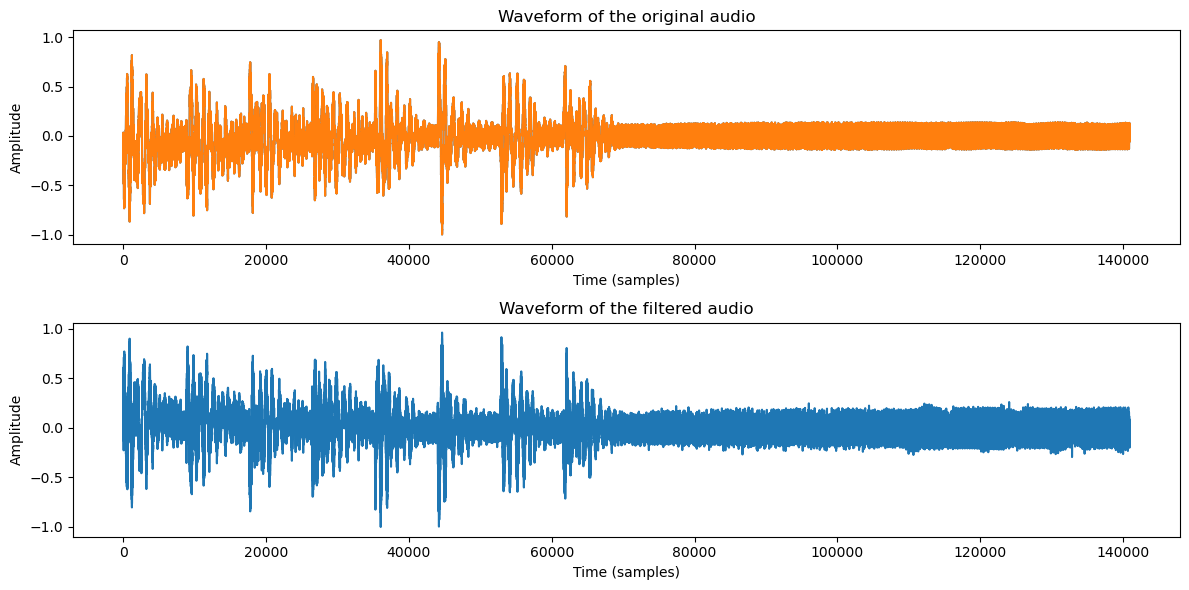

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

class Equalizer:
    def __init__(self, fs):
        self.fs = fs
        self.audio = None

    def apply_equalizer(self, audio, freq_bands, gains, gain_master=1.0, method='nonrecursive'):
        if method == 'nonrecursive':
            b = self.create_kih_filter(freq_bands, gains)
            audio_filtered = self.filter_kih(audio, b)
        elif method == 'recursive':
            b, a = self.create_recursive_filter(freq_bands, gains)
            audio_filtered = self.filter_recursive(audio, b, a)
        
        return audio_filtered

    def create_kih_filter(self, freq_bands, gains):
        alpha = 7e-7
        fft_len = 2048
        f = np.linspace(0, self.fs/2, fft_len//2, endpoint=True)
        x = np.ones_like(f)
        for i in range(len(freq_bands)):
            x *= 1 + gains[i] * np.exp(-alpha * (f - self.fs * freq_bands[i] / fft_len)**2)
        return x

    def filter_kih(self, audio, b):
        return np.convolve(audio, b, mode='same')

    def create_recursive_filter(self, freq_bands, gains):
        b = np.array([1.0] + gains)
        a = np.ones_like(b)
        return b, a
    
    def filter_recursive(self, audio, b, a):
        return np.convolve(audio, b, mode='same') - np.convolve(audio, a, mode='same')

    def save_audio(self, audio, filename='C:\\Users\\Админ\\Downloads\\filtered_audioTEST.wav'):
        scale_factor = np.iinfo(np.int16).max
        wavfile.write(filename, self.fs, (audio * scale_factor).astype(np.int16))

    def play_audio(self, audio):
        self.save_audio(audio)
        rate, audio_output = wavfile.read('C:\\Users\\Админ\\Downloads\\filtered_audioTEST.wav')
        self.audio = audio_output
        return audio_output

# Read the original WAV file
filename = 'C:\\Users\\Админ\\Downloads\\sample-3s.wav'
rate, audio_original = wavfile.read(filename)

# Create an Equalizer object
eq = Equalizer(rate)

# Define frequency bands and gains
freq_bands = [100, 500, 2000, 5000]
gains = [1.1, 0.9, 0.7, 1.2]

audio_filtered = eq.apply_equalizer(audio_original[:, 0], freq_bands, gains, gain_master=1.5, method='recursive')
# audio_filtered = eq.apply_equalizer(audio_original[:, 0], freq_bands, gains, gain_master=1.5, method='nonrecursive')

# Save the filtered audio to a new WAV file
eq.save_audio(audio_filtered, 'C:\\Users\\Админ\\Downloads\\filtered_audioTEST.wav')

# Plot the waveform of the original and filtered audio
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(audio_original / np.max(np.abs(audio_original)))
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Waveform of the original audio')

plt.subplot(2, 1, 2)
plt.plot(audio_filtered / np.max(np.abs(audio_filtered)))
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Waveform of the filtered audio')

plt.tight_layout()
plt.show()
